<a href="https://colab.research.google.com/github/Ndifreke000/Machine-Learning-Algorithms/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving asuu-finall.csv to asuu-finall.csv


In [ ]:
pip install pandas scikit-learn


In [ ]:
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
!pip install pandas scikit-learn transformers

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline
from sklearn.preprocessing import LabelEncoder
from transformers import AutoModelForSequenceClassification
from afinn import Afinn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download

In [ ]:
from nltk import download

In [ ]:
df = pd.read_csv('asuu-finall.csv', encoding='ISO-8859-1')
df.head(10)

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id
0,2022-05-16 20:48:42,Peter Obi,1050779471731707904,PeterObi,1050779471731707904,en,"<a href=""http://twitter.com/download/iphone"" r...",I also noted that education remains the only e...,NaN,NaN,615.0,1526273451618607106
1,2022-05-15 13:38:23,Dami Adenuga | JUNGLE CLUB,156563457,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",Congratulations to the youngins that passed ja...,NaN,NaN,158.0,1525802772272238592
2,2022-05-15 22:22:59,Channels Television,125346858,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ASUU Strike: FG Working On A Funding Structure...,NaN,NaN,88.0,1525934793204158464
3,2022-05-16 23:01:31,Alhaji_Dapxx??,4663353514,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...","RT @Naija_PR: Students have protested in Ondo,...",NaN,NaN,30.0,1526306876228509698
4,2022-05-16 23:01:31,ÅLEÊYÕU~11,1225577557392838664,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",RT @ankaboy: Make him do Transfer to ASUU kawea,NaN,NaN,5.0,1526306875582599169
5,2022-05-16 23:01:29,Solomon?,1487224750468444162,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",RT @Mbahdeyforyou: By the time ASUU go call of...,NaN,NaN,367.0,1526306868041240577
6,2022-05-16 23:01:21,mubarak_szn?,1516111930267734023,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",RT @Cizzar_x: If only ASUU knw der av billions...,NaN,NaN,34.0,1526306836751720457
7,2022-05-16 23:01:15,ObiEze??,1347184054165241860,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @renoomokri: Dear ASUU,\n\nIf the Accountan...",NaN,NaN,124.0,1526306808008253440
8,2022-05-16 23:01:09,pLáYbØy?????,1221759636371660800,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",RT @SolomonDey4You: When you type ASUU on Goog...,NaN,NaN,26.0,1526306784369065984
9,2022-05-16 23:01:07,Baffa,709114141,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...",RT @AM_Saleeem: Just In: EFCC arrested account...,NaN,NaN,65.0,1526306776378920967


In [ ]:
# Tokenize into words
df['Tokenized_Text'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
df['Cleaned_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuation])

# Generate bi-grams
df['Bi-grams'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))

# Print the DataFrame with the added columns
print(df[['From-User', 'Text', 'Cleaned_Text', 'Bi-grams', 'Retweet-Count']])

                        From-User  \
0                       Peter Obi   
1     Dami Adenuga | JUNGLE CLUB   
2             Channels Television   
3                  Alhaji_Dapxx??   
4                      ÅLEÊYÕU~11   
...                           ...   
9995                   Ivien Mike   
9996                  Kamalmadobi   
9997   Kainene with the Good hair   
9998             Dàmólà Àdéboyejó   
9999                 james garner   

                                                   Text  \
0     I also noted that education remains the only e...   
1     Congratulations to the youngins that passed ja...   
2     ASUU Strike: FG Working On A Funding Structure...   
3     RT @Naija_PR: Students have protested in Ondo,...   
4       RT @ankaboy: Make him do Transfer to ASUU kawea   
...                                                 ...   
9995  RT @favouredhero: ASUU has been on strike for ...   
9996  RT @channelstv: Buhari Ready To Resolve ASUU S...   
9997  RT @KhalifJgusau: 

In [ ]:
selected_columns = df[['Text', 'Cleaned_Text', 'Bi-grams', 'Retweet-Count']]
print(selected_columns)

                                                   Text  \
0     I also noted that education remains the only e...   
1     Congratulations to the youngins that passed ja...   
2     ASUU Strike: FG Working On A Funding Structure...   
3     RT @Naija_PR: Students have protested in Ondo,...   
4       RT @ankaboy: Make him do Transfer to ASUU kawea   
...                                                 ...   
9995  RT @favouredhero: ASUU has been on strike for ...   
9996  RT @channelstv: Buhari Ready To Resolve ASUU S...   
9997  RT @KhalifJgusau: BREAKING: ASUU Considers Buh...   
9998  Note:\n#English #Language #Test/#Certificate\n...   
9999  @DayoAmusa Boss please since ASUU isnt plannin...   

                                           Cleaned_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, asuu...   
2     [asuu, strike, fg, working, funding, structure...   
3     [rt, naija_pr, students, protested, ondo, ibad...

In [ ]:
selected_columns.head()

,Text,Cleaned_Text,Bi-grams,Retweet-Count
0,I also noted that education remains the only e...,"[also, noted, education, remains, enduring, le...","[(i, also), (also, noted), (noted, that), (tha...",615.0
1,Congratulations to the youngins that passed ja...,"[congratulations, youngins, passed, jamb, asuu...","[(congratulations, to), (to, the), (the, young...",158.0
2,ASUU Strike: FG Working On A Funding Structure...,"[asuu, strike, fg, working, funding, structure...","[(asuu, strike), (strike, :), (:, fg), (fg, wo...",88.0
3,"RT @Naija_PR: Students have protested in Ondo,...","[rt, naija_pr, students, protested, ondo, ibad...","[(rt, @), (@, naija_pr), (naija_pr, :), (:, st...",30.0
4,RT @ankaboy: Make him do Transfer to ASUU kawea,"[rt, ankaboy, make, transfer, asuu, kawea]","[(rt, @), (@, ankaboy), (ankaboy, :), (:, make...",5.0


In [ ]:
df['Tokenized_Text'] = df['Text'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
df['Cleaned_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuation])

# Generate n-grams (here, n=2 for bi-grams)
df['N-grams'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))

# Print the DataFrame with the added columns
print(df[['From-User', 'Text', 'Cleaned_Text', 'N-grams', 'Retweet-Count']])

                        From-User  \
0                       Peter Obi   
1     Dami Adenuga | JUNGLE CLUB   
2             Channels Television   
3                  Alhaji_Dapxx??   
4                      ÅLEÊYÕU~11   
...                           ...   
9995                   Ivien Mike   
9996                  Kamalmadobi   
9997   Kainene with the Good hair   
9998             Dàmólà Àdéboyejó   
9999                 james garner   

                                                   Text  \
0     I also noted that education remains the only e...   
1     Congratulations to the youngins that passed ja...   
2     ASUU Strike: FG Working On A Funding Structure...   
3     RT @Naija_PR: Students have protested in Ondo,...   
4       RT @ankaboy: Make him do Transfer to ASUU kawea   
...                                                 ...   
9995  RT @favouredhero: ASUU has been on strike for ...   
9996  RT @channelstv: Buhari Ready To Resolve ASUU S...   
9997  RT @KhalifJgusau: 

In [ ]:
print(df[['Text', 'Cleaned_Text', 'N-grams', 'Retweet-Count']].head())

                                                Text  \
0  I also noted that education remains the only e...   
1  Congratulations to the youngins that passed ja...   
2  ASUU Strike: FG Working On A Funding Structure...   
3  RT @Naija_PR: Students have protested in Ondo,...   
4    RT @ankaboy: Make him do Transfer to ASUU kawea   

                                        Cleaned_Text  \
0  [also, noted, education, remains, enduring, le...   
1  [congratulations, youngins, passed, jamb, asuu...   
2  [asuu, strike, fg, working, funding, structure...   
3  [rt, naija_pr, students, protested, ondo, ibad...   
4         [rt, ankaboy, make, transfer, asuu, kawea]   

                                             N-grams  Retweet-Count  
0  [(i, also), (also, noted), (noted, that), (tha...          615.0  
1  [(congratulations, to), (to, the), (the, young...          158.0  
2  [(asuu, strike), (strike, :), (:, fg), (fg, wo...           88.0  
3  [(rt, @), (@, naija_pr), (naija_pr, :), (:,

In [ ]:
df['Text'] = df['Text'].str.lower()

# Tokenize into words
df['Tokenized_Text'] = df['Text'].apply(lambda x: word_tokenize(x))

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
df['Cleaned_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuation])

# Generate n-grams (here, n=2 for bi-grams)
df['N-grams'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))

# Print the DataFrame with the added columns
print(df[['Cleaned_Text', 'N-grams', 'Retweet-Count']])

                                           Cleaned_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, asuu...   
2     [asuu, strike, fg, working, funding, structure...   
3     [rt, naija_pr, students, protested, ondo, ibad...   
4            [rt, ankaboy, make, transfer, asuu, kawea]   
...                                                 ...   
9995  [rt, favouredhero, asuu, strike, months, infla...   
9996  [rt, channelstv, buhari, ready, resolve, asuu,...   
9997  [rt, khalifjgusau, breaking, asuu, considers, ...   
9998  [note, english, language, test/, certificate, ...   
9999  [dayoamusa, boss, please, since, asuu, isnt, p...   

                                                N-grams  Retweet-Count  
0     [(i, also), (also, noted), (noted, that), (tha...          615.0  
1     [(congratulations, to), (to, the), (the, young...          158.0  
2     [(asuu, strike), (strike, :), (:, fg), (fg, wo...           88.0  

In [ ]:
print(df[['Cleaned_Text', 'N-grams', 'Retweet-Count']].head())

                                        Cleaned_Text  \
0  [also, noted, education, remains, enduring, le...   
1  [congratulations, youngins, passed, jamb, asuu...   
2  [asuu, strike, fg, working, funding, structure...   
3  [rt, naija_pr, students, protested, ondo, ibad...   
4         [rt, ankaboy, make, transfer, asuu, kawea]   

                                             N-grams  Retweet-Count  
0  [(i, also), (also, noted), (noted, that), (tha...          615.0  
1  [(congratulations, to), (to, the), (the, young...          158.0  
2  [(asuu, strike), (strike, :), (:, fg), (fg, wo...           88.0  
3  [(rt, @), (@, naija_pr), (naija_pr, :), (:, st...           30.0  
4  [(rt, @), (@, ankaboy), (ankaboy, :), (:, make...            5.0  


In [ ]:
df['Text'] = df['Text'].str.lower()

# Remove links
df['Text'] = df['Text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize into words
df['Tokenized_Text'] = df['Text'].apply(lambda x: word_tokenize(x))

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
df['Cleaned_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuation])

# Generate n-grams (here, n=2 for bi-grams)
df['N-grams'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))

# Print the DataFrame with the added columns
print(df[['Text', 'Cleaned_Text', 'N-grams', 'Retweet-Count']])

                                                   Text  \
0     i also noted that education remains the only e...   
1     congratulations to the youngins that passed ja...   
2     asuu strike: fg working on a funding structure...   
3     rt @naija_pr: students have protested in ondo,...   
4       rt @ankaboy: make him do transfer to asuu kawea   
...                                                 ...   
9995  rt @favouredhero: asuu has been on strike for ...   
9996  rt @channelstv: buhari ready to resolve asuu s...   
9997  rt @khalifjgusau: breaking: asuu considers buh...   
9998  note:\n#english #language #test/#certificate\n...   
9999  @dayoamusa boss please since asuu isnt plannin...   

                                           Cleaned_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, asuu...   
2     [asuu, strike, fg, working, funding, structure...   
3     [rt, naija_pr, students, protested, ondo, ibad...

In [ ]:
df['Text'] = df['Text'].str.lower()

# Remove links
df['Text'] = df['Text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize into words
df['Tokenized_Text'] = df['Text'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Cleaned_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])

# Lexicon-based filtering (you can replace lexicon_list with your own list)
lexicon_list = ['congratulations', 'protest']
df['Lexicon_Filtered_Text'] = df['Cleaned_Text'].apply(lambda x: [word for word in x if word not in lexicon_list])

# Generate n-grams (here, n=2 for bi-grams)
df['N-grams'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))

# Regular expression filtering (you can adjust the pattern as needed)
pattern = re.compile(r'\b\w{1,3}\b')
df['Regex_Filtered_Text'] = df['Cleaned_Text'].apply(lambda x: [word for word in x if not pattern.match(word)])

# Print the DataFrame with the added columns
print(df[['Text', 'Cleaned_Text', 'Lexicon_Filtered_Text', 'N-grams', 'Regex_Filtered_Text', 'Retweet-Count']])

                                                   Text  \
0     i also noted that education remains the only e...   
1     congratulations to the youngins that passed ja...   
2     asuu strike: fg working on a funding structure...   
3     rt @naija_pr: students have protested in ondo,...   
4       rt @ankaboy: make him do transfer to asuu kawea   
...                                                 ...   
9995  rt @favouredhero: asuu has been on strike for ...   
9996  rt @channelstv: buhari ready to resolve asuu s...   
9997  rt @khalifjgusau: breaking: asuu considers buh...   
9998  note:\n#english #language #test/#certificate\n...   
9999  @dayoamusa boss please since asuu isnt plannin...   

                                           Cleaned_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, ,, a...   
2     [asuu, strike, :, fg, working, funding, struct...   
3     [rt, @, naija_pr, :, students, protested, ondo...

In [ ]:
df['Text'] = df['Text'].str.lower()

# Remove links
df['Text'] = df['Text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize into words
df['Tokenized_Text'] = df['Text'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Cleaned_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])

# Filter tokens by length (from 4 to 25 characters)
df['Filtered_Text'] = df['Cleaned_Text'].apply(lambda x: [word for word in x if 4 <= len(word) <= 25])

# Generate n-grams (here, n=2 for bi-grams)
df['N-grams'] = df['Tokenized_Text'].apply(lambda x: list(ngrams(x, 2)))

# Print the DataFrame with the added columns
print(df[['From-User', 'Text', 'Cleaned_Text', 'Filtered_Text', 'N-grams', 'Retweet-Count']])

                        From-User  \
0                       Peter Obi   
1     Dami Adenuga | JUNGLE CLUB   
2             Channels Television   
3                  Alhaji_Dapxx??   
4                      ÅLEÊYÕU~11   
...                           ...   
9995                   Ivien Mike   
9996                  Kamalmadobi   
9997   Kainene with the Good hair   
9998             Dàmólà Àdéboyejó   
9999                 james garner   

                                                   Text  \
0     i also noted that education remains the only e...   
1     congratulations to the youngins that passed ja...   
2     asuu strike: fg working on a funding structure...   
3     rt @naija_pr: students have protested in ondo,...   
4       rt @ankaboy: make him do transfer to asuu kawea   
...                                                 ...   
9995  rt @favouredhero: asuu has been on strike for ...   
9996  rt @channelstv: buhari ready to resolve asuu s...   
9997  rt @khalifjgusau: 

In [ ]:
print(df[['Cleaned_Text','Lexicon_Filtered_Text', 'N-grams', 'Regex_Filtered_Text', 'Filtered_Text', 'N-grams',]])

                                           Cleaned_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, ,, a...   
2     [asuu, strike, :, fg, working, funding, struct...   
3     [rt, @, naija_pr, :, students, protested, ondo...   
4      [rt, @, ankaboy, :, make, transfer, asuu, kawea]   
...                                                 ...   
9995  [rt, @, favouredhero, :, asuu, strike, months,...   
9996  [rt, @, channelstv, :, buhari, ready, resolve,...   
9997  [rt, @, khalifjgusau, :, breaking, :, asuu, co...   
9998  [note, :, #, english, #, language, #, test/, #...   
9999  [@, dayoamusa, boss, please, since, asuu, isnt...   

                                  Lexicon_Filtered_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [youngins, passed, jamb, ,, asuu, trouble, ., ...   
2     [asuu, strike, :, fg, working, funding, struct...   
3     [rt, @, naija_pr, :, students, protested, ondo...

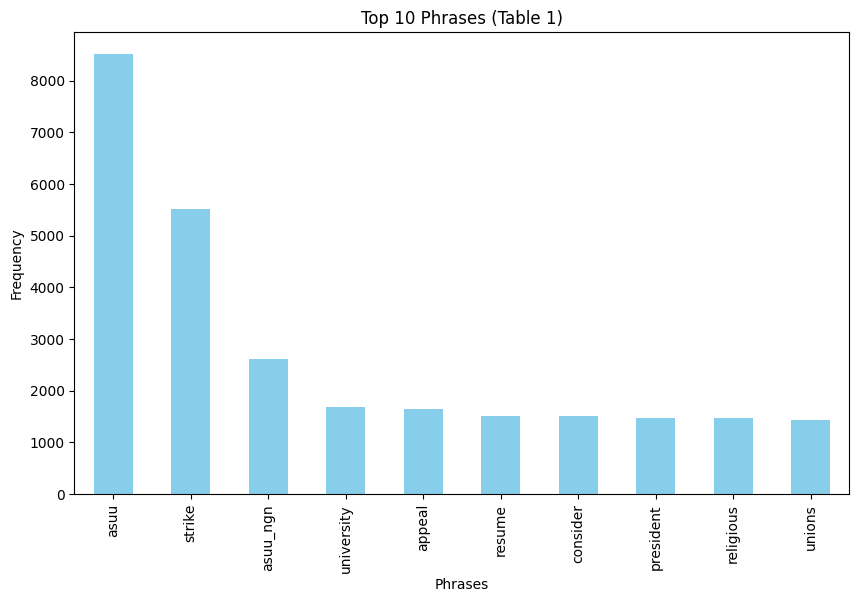

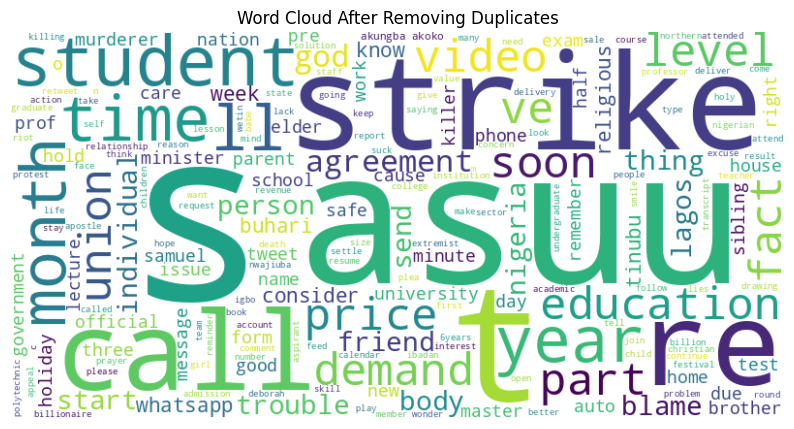

In [ ]:
top_phrases_table1 = df['Filtered_Text'].explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
top_phrases_table1.plot(kind='bar', color='skyblue')
plt.title('Top 10 Phrases (Table 1)')
plt.xlabel('Phrases')
plt.ylabel('Frequency')
plt.show()

# Generate Word Cloud after removing duplicates
filtered_text_after_duplicates = df['Filtered_Text'].explode().drop_duplicates().str.cat(sep=' ')

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_after_duplicates)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Removing Duplicates')
plt.show()

THE MODEL SECTION

In [ ]:
from transformers import AutoModelForSequenceClassification

# Replace 'distilbert-base-uncased-finetuned-sst-2-english' with the desired model name
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'

# Download the model
model = AutoModelForSequenceClassification.from_pretrained(model_name)



In [ ]:
from transformers import pipeline

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Apply sentiment analysis to each row in the 'Filtered_Text' column
df['Sentiment'] = df['Filtered_Text'].apply(lambda x: sentiment_analyzer(' '.join(x))[0]['label'])

# Display the updated DataFrame


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Display the updated DataFrame
df.head()


,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,...,Id,lower,Tokenized_Text,Cleaned_Text,Bi-grams,N-grams,Lexicon_Filtered_Text,Regex_Filtered_Text,Filtered_Text,Sentiment
0,2022-05-16 20:48:42,Peter Obi,1050779471731707904,PeterObi,1050779471731707904,en,"<a href=""http://twitter.com/download/iphone"" r...",also noted education remains enduring legacy f...,NaN,NaN,...,1526273451618607106,i also noted that education remains the only e...,"[i, also, noted, that, education, remains, the...","[also, noted, education, remains, enduring, le...","[(i, also), (also, noted), (noted, that), (tha...","[(i, also), (also, noted), (noted, that), (tha...","[also, noted, education, remains, enduring, le...","[also, noted, education, remains, enduring, le...","[also, noted, education, remains, enduring, le...",1
1,2022-05-15 13:38:23,Dami Adenuga | JUNGLE CLUB,156563457,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",congratulations youngins passed jamb asuu trou...,NaN,NaN,...,1525802772272238592,congratulations to the youngins that passed ja...,"[congratulations, to, the, youngins, that, pas...","[congratulations, youngins, passed, jamb, ,, a...","[(congratulations, to), (to, the), (the, young...","[(congratulations, to), (to, the), (the, young...","[youngins, passed, jamb, ,, asuu, trouble, ., ...","[congratulations, youngins, passed, jamb, ,, a...","[congratulations, youngins, passed, jamb, asuu...",0
2,2022-05-15 22:22:59,Channels Television,125346858,NaN,-1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",asuu strike working funding structure public u...,NaN,NaN,...,1525934793204158464,asuu strike: fg working on a funding structure...,"[asuu, strike, :, fg, working, on, a, funding,...","[asuu, strike, :, fg, working, funding, struct...","[(asuu, strike), (strike, :), (:, fg), (fg, wo...","[(asuu, strike), (strike, :), (:, fg), (fg, wo...","[asuu, strike, :, fg, working, funding, struct...","[asuu, strike, :, working, funding, structure,...","[asuu, strike, working, funding, structure, pu...",0
3,2022-05-16 23:01:31,Alhaji_Dapxx??,4663353514,NaN,-1,en,"<a href=""http://twitter.com/download/iphone"" r...",naija_pr students protested ondo ibadan blocke...,NaN,NaN,...,1526306876228509698,"rt @naija_pr: students have protested in ondo,...","[rt, @, naija_pr, :, students, have, protested...","[rt, @, naija_pr, :, students, protested, ondo...","[(rt, @), (@, naija_pr), (naija_pr, :), (:, st...","[(rt, @), (@, naija_pr), (naija_pr, :), (:, st...","[rt, @, naija_pr, :, students, protested, ondo...","[@, naija_pr, :, students, protested, ondo, ,,...","[naija_pr, students, protested, ondo, ibadan, ...",0
4,2022-05-16 23:01:31,ÅLEÊYÕU~11,1225577557392838664,NaN,-1,en,"<a href=""http://twitter.com/download/android"" ...",ankaboy make transfer asuu kawea,NaN,NaN,...,1526306875582599169,rt @ankaboy: make him do transfer to asuu kawea,"[rt, @, ankaboy, :, make, him, do, transfer, t...","[rt, @, ankaboy, :, make, transfer, asuu, kawea]","[(rt, @), (@, ankaboy), (ankaboy, :), (:, make...","[(rt, @), (@, ankaboy), (ankaboy, :), (:, make...","[rt, @, ankaboy, :, make, transfer, asuu, kawea]","[@, ankaboy, :, make, transfer, asuu, kawea]","[ankaboy, make, transfer, asuu, kawea]",1


In [ ]:
print(df[['Cleaned_Text','Lexicon_Filtered_Text', 'N-grams', 'Regex_Filtered_Text', 'Filtered_Text', 'N-grams',]])

                                           Cleaned_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, ,, a...   
2     [asuu, strike, :, fg, working, funding, struct...   
3     [rt, @, naija_pr, :, students, protested, ondo...   
4      [rt, @, ankaboy, :, make, transfer, asuu, kawea]   
...                                                 ...   
9995  [rt, @, favouredhero, :, asuu, strike, months,...   
9996  [rt, @, channelstv, :, buhari, ready, resolve,...   
9997  [rt, @, khalifjgusau, :, breaking, :, asuu, co...   
9998  [note, :, #, english, #, language, #, test/, #...   
9999  [@, dayoamusa, boss, please, since, asuu, isnt...   

                                  Lexicon_Filtered_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [youngins, passed, jamb, ,, asuu, trouble, ., ...   
2     [asuu, strike, :, fg, working, funding, struct...   
3     [rt, @, naija_pr, :, students, protested, ondo...

In [ ]:
!pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=37ae58aa5f5ff7a9a36ec3b4ef20eb602a80f598abb17ce46b17db885171cdf2
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
afinn = Afinn()

# Apply sentiment analysis to the 'Filtered_Text' column
df['Sentiment_Score'] = df['Filtered_Text'].apply(lambda x: afinn.score(' '.join(x)))
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Display the updated DataFrame
print(df[['Filtered_Text', 'Sentiment_Score', 'Sentiment_Label']])

                                          Filtered_Text  Sentiment_Score  \
0     [also, noted, education, remains, enduring, le...             -1.0   
1     [congratulations, youngins, passed, jamb, asuu...             -2.0   
2     [asuu, strike, working, funding, structure, pu...             -1.0   
3     [naija_pr, students, protested, ondo, ibadan, ...             -2.0   
4                [ankaboy, make, transfer, asuu, kawea]              0.0   
...                                                 ...              ...   
9995  [favouredhero, asuu, strike, months, inflation...             -1.0   
9996  [channelstv, buhari, ready, resolve, asuu, str...              1.0   
9997  [khalifjgusau, breaking, asuu, considers, buha...             -2.0   
9998  [note, english, language, test/, certificate, ...              2.0   
9999  [dayoamusa, boss, please, since, asuu, isnt, p...              1.0   

     Sentiment_Label  
0           negative  
1           negative  
2           negati

In [ ]:

# Download the VADER lexicon
download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()


# Apply sentiment analysis to the 'Filtered_Text' column
df['Sentiment_Scores'] = df['Filtered_Text'].apply(lambda x: sia.polarity_scores(' '.join(x)))

# Extract compound scores and classify sentiment labels
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['compound'])
df['Sentiment_Label'] = df['Compound_Score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Display the updated DataFrame
print(df[['Filtered_Text', 'Sentiment_Scores', 'Compound_Score', 'Sentiment_Label']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          Filtered_Text  \
0     [also, noted, education, remains, enduring, le...   
1     [congratulations, youngins, passed, jamb, asuu...   
2     [asuu, strike, working, funding, structure, pu...   
3     [naija_pr, students, protested, ondo, ibadan, ...   
4                [ankaboy, make, transfer, asuu, kawea]   
...                                                 ...   
9995  [favouredhero, asuu, strike, months, inflation...   
9996  [channelstv, buhari, ready, resolve, asuu, str...   
9997  [khalifjgusau, breaking, asuu, considers, buha...   
9998  [note, english, language, test/, certificate, ...   
9999  [dayoamusa, boss, please, since, asuu, isnt, p...   

                                       Sentiment_Scores  Compound_Score  \
0     {'neg': 0.076, 'neu': 0.808, 'pos': 0.116, 'co...          0.2023   
1     {'neg': 0.335, 'neu': 0.447, 'pos': 0.218, 'co...         -0.2732   
2     {'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'comp...         -0

In [ ]:
# Apply sentiment analysis to the 'Filtered_Text' column
df['Sentiment_Scores'] = df['Filtered_Text'].apply(lambda x: sia.polarity_scores(' '.join(x)))

# Extract positive, negative, neutral, and compound scores
df['Positive_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['pos'])
df['Negative_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['neg'])
df['Neutral_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['neu'])
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['compound'])

# Display the updated DataFrame
print(df[['Filtered_Text', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score']].head(200))

                                         Filtered_Text  Positive_Score  \
0    [also, noted, education, remains, enduring, le...           0.116   
1    [congratulations, youngins, passed, jamb, asuu...           0.218   
2    [asuu, strike, working, funding, structure, pu...           0.000   
3    [naija_pr, students, protested, ondo, ibadan, ...           0.000   
4               [ankaboy, make, transfer, asuu, kawea]           0.000   
..                                                 ...             ...   
195  [abdulmuiznuru, outfits, asuu, outfits, know, ...           0.000   
196          [samuelb23281430, asuu_ngn, follow, back]           0.000   
197   [whoamiplx_, asuu, failed, sigh, start, reading]           0.131   
198  [believe, news, chanel, 2023, presidential, as...           0.000   
199  [asuu, calls, strike, appeal, school, means, a...           0.000   

     Negative_Score  Neutral_Score  Compound_Score  
0             0.076          0.808          0.2023  
1    

In [ ]:
# Apply sentiment analysis to the 'Filtered_Text' column
df['Sentiment_Scores'] = df['Filtered_Text'].apply(lambda x: sia.polarity_scores(' '.join(x)))

# Extract compound scores
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['compound'])

# Categorize tweets based on compound scores
df['Sentiment_Category'] = pd.cut(df['Compound_Score'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

# Display the updated DataFrame
print(df[['Filtered_Text', 'Compound_Score', 'Sentiment_Category']])

                                          Filtered_Text  Compound_Score  \
0     [also, noted, education, remains, enduring, le...          0.2023   
1     [congratulations, youngins, passed, jamb, asuu...         -0.2732   
2     [asuu, strike, working, funding, structure, pu...         -0.1280   
3     [naija_pr, students, protested, ondo, ibadan, ...         -0.4767   
4                [ankaboy, make, transfer, asuu, kawea]          0.0000   
...                                                 ...             ...   
9995  [favouredhero, asuu, strike, months, inflation...         -0.1280   
9996  [channelstv, buhari, ready, resolve, asuu, str...          0.5574   
9997  [khalifjgusau, breaking, asuu, considers, buha...         -0.4215   
9998  [note, english, language, test/, certificate, ...          0.5719   
9999  [dayoamusa, boss, please, since, asuu, isnt, p...          0.4534   

     Sentiment_Category  
0              Positive  
1              Negative  
2              Negati

In [ ]:
sia = SentimentIntensityAnalyzer()
# Apply sentiment analysis to the 'Filtered_Text' column
df['Sentiment_Scores'] = df['Filtered_Text'].apply(lambda x: sia.polarity_scores(' '.join(x)))

# Extract compound scores
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda scores: scores['compound'])

# Rule-Based Model (RM) for categorizing tweets
df['Sentiment_Category'] = df['Compound_Score'].apply(lambda score: 'Positive' if score > 0.05 else ('Neutral' if -0.05 <= score <= 0.05 else 'Negative'))

# Display the updated DataFrame
print(df[['Filtered_Text', 'Compound_Score', 'Sentiment_Category']])


                                          Filtered_Text  Compound_Score  \
0     [also, noted, education, remains, enduring, le...          0.2023   
1     [congratulations, youngins, passed, jamb, asuu...         -0.2732   
2     [asuu, strike, working, funding, structure, pu...         -0.1280   
3     [naija_pr, students, protested, ondo, ibadan, ...         -0.4767   
4                [ankaboy, make, transfer, asuu, kawea]          0.0000   
...                                                 ...             ...   
9995  [favouredhero, asuu, strike, months, inflation...         -0.1280   
9996  [channelstv, buhari, ready, resolve, asuu, str...          0.5574   
9997  [khalifjgusau, breaking, asuu, considers, buha...         -0.4215   
9998  [note, english, language, test/, certificate, ...          0.5719   
9999  [dayoamusa, boss, please, since, asuu, isnt, p...          0.4534   

     Sentiment_Category  
0              Positive  
1              Negative  
2              Negati

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'df' is your DataFrame with 'Filtered_Text' column
filtered_text_list = [' '.join(words) for words in df['Filtered_Text']]

# Convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(filtered_text_list)

# Apply LDA
num_topics = 5  # You can adjust this based on the expected number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]  # Display top 10 words
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

# Assign topics to the DataFrame
df['Topic'] = lda.transform(dtm).argmax(axis=1)

# Display the DataFrame with added 'Topic' column
print(df[['Filtered_Text', 'Compound_Score', 'Sentiment_Category', 'Topic']].head())


Topic #1: asuu, asuu_ngn, strike, make, asuungr, money, students, school, want, like
Topic #2: asuu, strike, university, appeal, consider, resume, religious, body, nigeria, work
Topic #3: asuu, strike, today, agreement, president, soon, tinubu, student, marketing, pencil
Topic #4: asuu, strike, protest, sokoto, things, lowkey, ovo_himself449, missing, people, killing
Topic #5: asuu, strike, jamb, transcript, result, students, like, admission, unilag, education
                                       Filtered_Text  Compound_Score  \
0  [also, noted, education, remains, enduring, le...          0.2023   
1  [congratulations, youngins, passed, jamb, asuu...         -0.2732   
2  [asuu, strike, working, funding, structure, pu...         -0.1280   
3  [naija_pr, students, protested, ondo, ibadan, ...         -0.4767   
4             [ankaboy, make, transfer, asuu, kawea]          0.0000   

  Sentiment_Category  Topic  
0           Positive      4  
1           Negative      4  
2           

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'df' with 'Text' and 'Sentiment_Category' columns
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment_Category'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVM Model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

    Negative       0.94      0.96      0.95      1070
     Neutral       0.87      0.92      0.90       386
    Positive       0.94      0.86      0.90       544

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine-tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best model from grid search
best_svm_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_best = best_svm_model.predict(X_test_tfidf)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the Best Model: {accuracy_best:.2f}")
print("Classification Report for the Best Model:\n", classification_report(y_test, y_pred_best))


Accuracy of the Best Model: 0.92
Classification Report for the Best Model:
               precision    recall  f1-score   support

    Negative       0.94      0.96      0.95      1070
     Neutral       0.87      0.92      0.90       386
    Positive       0.94      0.86      0.90       544

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000

